install dask for paraller processing

In [ ]:
pip install dask[complete]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 837 kB 5.3 MB/s 
     |████████████████████████████████| 140 kB 43.4 MB/s 
     |████████████████████████████████| 830 kB 42.5 MB/s 
     |████████████████████████████████| 822 kB 40.1 MB/s 
     |████████████████████████████████| 802 kB 43.5 MB/s 
     |████████████████████████████████| 802 kB 45.1 MB/s 
     |████████████████████████████████| 793 kB 38.8 MB/s 
     |████████████████████████████████| 793 kB 43.2 MB/s 
     |████████████████████████████████| 791 kB 44.1 MB/s 
     |████████████████████████████████| 786 kB 44.3 MB/s 
     |████████████████████████████████| 779 kB 44.4 MB/s 
     |████████████████████████████████| 778 kB 42.2 MB/s 
     |████████████████████████████████| 776 kB 24.4 MB/s 
     |████████████████████████████████| 769 kB 44.3 MB/s 
     |████████████████████████████████| 766 kB 45.5 MB/s 
     |██████████████████████████

In [ ]:
import pandas as pd
import numpy as np
import dask
import dask.dataframe as dd
import seaborn as sns

In [ ]:
cd drive/MyDrive/AMEX

/content/drive/MyDrive/AMEX


In [ ]:
data = pd.read_csv('combined_sample.csv')

In [ ]:
data.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,274223.000000,2.765650e+05,276565.000000,2.764680e+05,2.765650e+05,225826.000000,2.764680e+05,2.764680e+05,39457.000000,1.938960e+05,...,9.844000e+03,9844.000000,2.715280e+05,2.745530e+05,2.715280e+05,47505.000000,2.715280e+05,2.745470e+05,2.715280e+05,276565.000000
mean,0.656150,1.530110e-01,0.124360,6.208769e-01,7.887896e-02,0.226089,5.973276e-02,1.323031e-01,0.184547,1.547866e-01,...,1.427632e-02,0.158983,1.799527e-01,2.681450e-02,1.654826e-01,0.390701,1.798443e-01,5.267286e-02,6.226399e-02,0.248661
std,0.244899,2.702983e-01,0.212599,4.017530e-01,2.262091e-01,0.193276,2.016825e-01,2.347678e-01,0.221426,2.150028e-01,...,9.578055e-02,0.263622,3.799452e-01,1.461072e-01,3.491233e-01,0.235230,3.798494e-01,1.830950e-01,1.925425e-01,0.432238
min,-0.391206,7.357894e-08,-0.799453,4.219620e-07,1.065542e-08,-0.453802,1.580859e-07,8.087374e-08,-0.000285,1.160652e-07,...,4.274578e-07,0.000001,2.454762e-08,5.186710e-09,1.073346e-08,-0.011063,2.058036e-08,2.500991e-09,2.150724e-08,0.000000
25%,0.479913,4.527890e-03,0.008881,1.049494e-01,2.913883e-03,0.127346,2.876207e-03,5.243700e-03,0.036852,4.210330e-02,...,2.576416e-03,0.003405,3.017390e-03,2.554295e-03,3.034174e-03,0.198175,3.027048e-03,2.739838e-03,3.024538e-03,0.000000
50%,0.694399,9.047627e-03,0.031467,8.143257e-01,5.803458e-03,0.163970,5.739748e-03,9.801330e-03,0.121019,8.835785e-02,...,5.069772e-03,0.006982,6.048028e-03,5.108438e-03,6.063516e-03,0.382052,6.055480e-03,5.502429e-03,6.041656e-03,0.000000
75%,0.864717,2.368323e-01,0.125771,1.002385e+00,8.673956e-03,0.258652,8.605937e-03,1.540318e-01,0.251319,1.843833e-01,...,7.612230e-03,0.501291,9.090484e-03,7.660540e-03,9.099254e-03,0.558844,9.086517e-03,8.261977e-03,9.084368e-03,0.000000
max,1.010000,5.331360e+00,1.324059,1.010000e+00,2.527867e+00,5.018255,7.082583e+00,1.447139e+00,3.892957,9.146683e+00,...,1.009806e+00,3.001552,1.010000e+00,1.009996e+00,1.244132e+00,1.817202,1.010000e+00,1.343288e+00,4.730606e+00,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276565 entries, 0 to 276564
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 403.0+ MB


In [ ]:
data.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

In [ ]:
data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,00d02ad8d975c5119beed96427082960647bc9330dcd0d...,2017-07-11,0.733897,0.418841,0.034495,1.009152,0.006520,0.395961,0.001022,0.010428,...,NaN,NaN,0.004062,0.007383,0.007780,NaN,0.004547,0.007964,0.008626,0
1,00f8422df3e792b646ee75dd6c5469e263f4f50cd90570...,2017-07-04,0.682768,0.006512,0.126788,1.007695,0.501783,0.176268,0.009242,0.001740,...,NaN,NaN,0.002186,0.007349,0.009796,NaN,0.004737,0.007703,0.005441,0
2,0019dd523506d023120548b46061ed4a67ab6e1cd88c6a...,2017-12-23,0.981684,0.008027,0.005318,0.813393,0.005138,NaN,0.000269,0.006828,...,NaN,NaN,0.007567,0.002025,0.002635,NaN,0.004297,0.007744,0.001628,0
3,00600d435f44a5686b7e9e5f5837b1357565d96ee3ac96...,2017-09-22,0.808765,0.007848,0.038406,1.005143,0.001916,-0.028870,0.009519,0.006579,...,NaN,NaN,0.001609,0.003561,0.008609,NaN,0.008045,0.007589,0.008042,0
4,00a309591529739b93fd0601ff4c275ae4a919f560bf3f...,2017-05-18,0.782119,0.001374,0.015341,1.007530,0.007454,0.146037,0.001659,0.001932,...,NaN,NaN,0.006309,0.008097,0.003835,NaN,0.004677,0.008510,0.004331,0


In [ ]:
data.shape

(276565, 191)

In [ ]:
data.isna().sum()

customer_ID         0
S_2                 0
P_2              2342
D_39                0
B_1                 0
                ...  
D_142          229060
D_143            5037
D_144            2018
D_145            5037
target              0
Length: 191, dtype: int64

In [ ]:
keys = []
for column in data.columns:
  if len(data[column].unique())== data.shape[0]:
    keys.append(column)

In [ ]:
len(keys)

66

In [ ]:
benchmark = data.drop(keys,axis=1)
benchmark

,customer_ID,S_2,P_2,B_2,S_3,D_41,B_3,D_42,D_43,D_44,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,00d02ad8d975c5119beed96427082960647bc9330dcd0d...,2017-07-11,0.733897,1.009152,0.395961,0.001022,0.010428,NaN,0.054286,0.005942,...,NaN,NaN,0.004062,0.007383,0.007780,NaN,0.004547,0.007964,0.008626,0
1,00f8422df3e792b646ee75dd6c5469e263f4f50cd90570...,2017-07-04,0.682768,1.007695,0.176268,0.009242,0.001740,0.233422,NaN,0.126292,...,NaN,NaN,0.002186,0.007349,0.009796,NaN,0.004737,0.007703,0.005441,0
2,0019dd523506d023120548b46061ed4a67ab6e1cd88c6a...,2017-12-23,0.981684,0.813393,NaN,0.000269,0.006828,NaN,NaN,0.005318,...,NaN,NaN,0.007567,0.002025,0.002635,NaN,0.004297,0.007744,0.001628,0
3,00600d435f44a5686b7e9e5f5837b1357565d96ee3ac96...,2017-09-22,0.808765,1.005143,-0.028870,0.009519,0.006579,NaN,NaN,0.004778,...,NaN,NaN,0.001609,0.003561,0.008609,NaN,0.008045,0.007589,0.008042,0
4,00a309591529739b93fd0601ff4c275ae4a919f560bf3f...,2017-05-18,0.782119,1.007530,0.146037,0.001659,0.001932,NaN,NaN,0.005340,...,NaN,NaN,0.006309,0.008097,0.003835,NaN,0.004677,0.008510,0.004331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276560,ff6278d78d5f7439855ddc5ede0c163fb2d526e6bb99e0...,2017-12-11,0.834860,0.814757,NaN,0.002541,0.007030,NaN,NaN,0.008552,...,NaN,NaN,0.008890,0.005856,0.001742,NaN,0.009283,0.009916,0.004318,0
276561,ffd1c2bda3a13a03e89f2b049bf0466f432bbe60c8c2cc...,2017-04-05,0.562767,0.050490,0.169584,0.002944,0.110873,NaN,NaN,0.256697,...,NaN,NaN,0.002384,0.004904,0.006718,NaN,0.005066,0.009099,0.005382,0
276562,ff2d6217f54228c90da93afd373d329b99a3eb6de292f6...,2017-09-06,0.841637,1.005865,0.110913,0.000859,0.008155,0.004865,NaN,0.003457,...,NaN,NaN,0.002750,0.005920,0.001444,NaN,0.001119,0.003763,0.009431,0
276563,ff9dcae400b41f4497be49a5f28ae2368811b84cb301e2...,2017-06-05,0.677573,1.008350,0.163076,0.004866,0.009651,NaN,0.063728,0.007519,...,NaN,NaN,1.009251,0.004246,0.877599,0.403782,1.002405,0.202403,1.188127,0


In [ ]:
len(benchmark.customer_ID[benchmark.D_87==1].unique())

179

In [ ]:
temp =pd.DataFrame(benchmark.isna().sum())
temp.sort_values(0,ascending=False)

,0
D_87,276356
D_88,276268
D_108,275109
D_110,275002
D_111,275002
...,...
customer_ID,0
B_31,0
S_2,0
D_63,0


In [ ]:
def get_feature_type(dataset,threshold=10): #manual analysis is necessary to determine the threshold before calling this function. This function helps in marking features as continuous and categorical
    feature_type = []
    for i in dataset.columns:
        count = len(dataset[i].unique())
        if isinstance(dataset[i].iloc[0],str) or count<=threshold:
            feature_type.append('categorical')
        else:
            feature_type.append('continuous')
    return feature_type

In [ ]:
features = get_feature_type(benchmark,10)
feature_dict = dict (zip(benchmark.columns,features))
cont_features = [k for k, v in feature_dict.items() if v == 'continuous']
corrmet = benchmark[cont_features].corr(method ='pearson')

In [ ]:
np.array(corrmet.columns)

array(['P_2', 'B_2', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'D_45',
       'D_46', 'D_48', 'D_49', 'B_6', 'B_8', 'D_50', 'D_52', 'P_3',
       'D_53', 'D_54', 'S_7', 'D_55', 'D_56', 'B_13', 'S_9', 'D_59',
       'D_61', 'B_15', 'D_62', 'B_16', 'B_17', 'B_19', 'B_20', 'D_69',
       'B_22', 'D_70', 'D_72', 'D_73', 'D_74', 'D_76', 'D_77', 'B_25',
       'B_26', 'D_78', 'D_79', 'R_9', 'D_80', 'B_27', 'D_81', 'D_82',
       'R_12', 'D_83', 'D_84', 'B_29', 'D_88', 'R_20', 'B_33', 'D_89',
       'D_91', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'D_102', 'D_103',
       'D_104', 'D_105', 'D_106', 'D_107', 'B_37', 'R_26', 'R_27',
       'D_108', 'D_109', 'D_110', 'D_111', 'B_39', 'D_112', 'B_40',
       'S_27', 'D_113', 'D_115', 'D_118', 'D_119', 'D_121', 'D_122',
       'D_123', 'D_124', 'D_125', 'D_128', 'D_129', 'B_41', 'B_42',
       'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136',
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_1

In [ ]:
correlated_feature_matrix= corrmet[(abs(corrmet) >= 0.7) & (corrmet != 1.0) ]
correlated_feature_matrix

,P_2,B_2,S_3,D_41,B_3,D_42,D_43,D_44,D_45,D_46,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
P_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_2,NaN,NaN,NaN,NaN,-0.711905,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_3,NaN,-0.711905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.998164,NaN,NaN,0.78046,0.99775,NaN,NaN
D_142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.78046,NaN,NaN,NaN,NaN
D_143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.999558,NaN,0.99775,NaN,NaN,NaN,NaN
D_144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#correlated_feature_matrix['P_2']['P_2']
correlated_feature_matrix[correlated_feature_matrix['P_2'].notnull()].index.values

array(['D_48'], dtype=object)

In [ ]:
correlated_tuples = []
for i in correlated_feature_matrix.index:
  for j in correlated_feature_matrix.columns:
    if i == j:
      continue
    else:
      if not np.isnan(correlated_feature_matrix[i][j]):
        if (j,i) in correlated_tuples:
          continue
        else:
          correlated_tuples.append((i,j))

sorted(correlated_tuples)

[('B_13', 'B_15'),
 ('B_16', 'B_20'),
 ('B_16', 'B_33'),
 ('B_19', 'B_37'),
 ('B_2', 'B_16'),
 ('B_2', 'B_20'),
 ('B_2', 'B_3'),
 ('B_2', 'B_33'),
 ('B_20', 'B_33'),
 ('B_3', 'B_16'),
 ('B_3', 'B_19'),
 ('B_3', 'B_20'),
 ('B_3', 'B_22'),
 ('B_3', 'B_37'),
 ('D_102', 'D_103'),
 ('D_102', 'D_104'),
 ('D_102', 'D_105'),
 ('D_103', 'D_104'),
 ('D_103', 'D_107'),
 ('D_104', 'D_105'),
 ('D_104', 'D_107'),
 ('D_115', 'D_118'),
 ('D_115', 'D_119'),
 ('D_118', 'D_119'),
 ('D_128', 'D_129'),
 ('D_131', 'D_132'),
 ('D_131', 'D_133'),
 ('D_139', 'D_141'),
 ('D_139', 'D_143'),
 ('D_141', 'D_142'),
 ('D_141', 'D_143'),
 ('D_44', 'D_74'),
 ('D_45', 'B_8'),
 ('D_48', 'D_55'),
 ('D_48', 'D_61'),
 ('D_53', 'D_81'),
 ('D_53', 'D_84'),
 ('D_55', 'D_61'),
 ('D_62', 'D_77'),
 ('D_73', 'B_42'),
 ('D_79', 'D_131'),
 ('D_88', 'D_108'),
 ('P_2', 'D_48'),
 ('S_22', 'S_24'),
 ('S_3', 'S_7')]

In [ ]:
correlated_features = {}
for col in corrmet.columns:
    correlated_features[col]=(list(correlated_feature_matrix[correlated_feature_matrix[col].notnull()].index))


for feature in correlated_features.copy():
  if len(correlated_features[feature])==0:
    del correlated_features[feature]
correlated_features

{'B_13': ['B_15'],
 'B_15': ['B_13'],
 'B_16': ['B_2', 'B_3', 'B_20', 'B_33'],
 'B_19': ['B_3', 'B_37'],
 'B_2': ['B_3', 'B_16', 'B_20', 'B_33'],
 'B_20': ['B_2', 'B_3', 'B_16', 'B_33'],
 'B_22': ['B_3'],
 'B_3': ['B_2', 'B_16', 'B_19', 'B_20', 'B_22', 'B_37'],
 'B_33': ['B_2', 'B_16', 'B_20'],
 'B_37': ['B_3', 'B_19'],
 'B_42': ['D_73'],
 'B_8': ['D_45'],
 'D_102': ['D_103', 'D_104', 'D_105'],
 'D_103': ['D_102', 'D_104', 'D_107'],
 'D_104': ['D_102', 'D_103', 'D_105', 'D_107'],
 'D_105': ['D_102', 'D_104'],
 'D_107': ['D_103', 'D_104'],
 'D_108': ['D_88'],
 'D_115': ['D_118', 'D_119'],
 'D_118': ['D_115', 'D_119'],
 'D_119': ['D_115', 'D_118'],
 'D_128': ['D_129'],
 'D_129': ['D_128'],
 'D_131': ['D_79', 'D_132', 'D_133'],
 'D_132': ['D_131'],
 'D_133': ['D_131'],
 'D_139': ['D_141', 'D_143'],
 'D_141': ['D_139', 'D_142', 'D_143'],
 'D_142': ['D_141'],
 'D_143': ['D_139', 'D_141'],
 'D_44': ['D_74'],
 'D_45': ['B_8'],
 'D_48': ['P_2', 'D_55', 'D_61'],
 'D_53': ['D_81', 'D_84'],
 'D_5

In [ ]:
#attributes to drop
drop_cols = ['B_13','B_16','B_20', 'B_33', 'B_2', 'B_3', 'B_19', 'B_37', 'S_22', 'S_3', 'P_2', 'D_55', 'D_61', 'D_131', 'D_88', 'D_73','D_48', 'D_77', 'D_55', 'D_53', 'B_8', 'D_44', 'D_102','D_103','D_104', 'D_118', 'D_119', 'D_128', 'D_139', 'D_141']
benchmark = benchmark.drop(drop_cols,axis=1)


KeyError: ignored

In [ ]:
type(benchmark.isnull().sum())

pandas.core.series.Series

In [ ]:
# impute missing values
# impute 10% missing data with mean values
for index, i in enumerate(benchmark.columns):
    benchmark.isnull().sum()/len(df)*100

,D_41,D_42,D_43,D_45,D_46,D_49,B_6,D_50,D_52,P_3,...,D_135,D_136,D_137,D_138,D_140,D_142,D_143,D_144,D_145,target
count,2.764680e+05,39457.000000,1.938960e+05,276468.000000,215784.000000,27481.000000,276552.000000,119422.000000,275069.000000,261524.000000,...,9844.000000,9.844000e+03,9.844000e+03,9844.000000,2.745530e+05,47505.000000,2.715280e+05,2.745470e+05,2.715280e+05,276565.000000
mean,5.973276e-02,0.184547,1.547866e-01,0.252491,0.474988,0.190505,0.152822,0.171704,0.179924,0.601011,...,0.029272,2.434627e-01,1.427632e-02,0.158983,2.681450e-02,0.390701,1.798443e-01,5.267286e-02,6.226399e-02,0.248661
std,2.016825e-01,0.221426,2.150028e-01,0.243120,0.168379,0.264910,1.466991,0.564711,0.173876,0.170999,...,0.153969,2.062096e-01,9.578055e-02,0.263622,1.461072e-01,0.235230,3.798494e-01,1.830950e-01,1.925425e-01,0.432238
min,1.580859e-07,-0.000285,1.160652e-07,0.000004,-4.273248,0.000004,-0.004709,-2.993541,-0.006902,-1.219636,...,0.000002,3.211948e-07,4.274578e-07,0.000001,5.186710e-09,-0.011063,2.058036e-08,2.500991e-09,2.150724e-08,0.000000
25%,2.876207e-03,0.036852,4.210330e-02,0.054581,0.425173,0.061424,0.020461,0.064297,0.073512,0.540338,...,0.002548,9.530627e-03,2.576416e-03,0.003405,2.554295e-03,0.198175,3.027048e-03,2.739838e-03,3.024538e-03,0.000000
50%,5.739748e-03,0.121019,8.835785e-02,0.180416,0.459435,0.130406,0.083230,0.108868,0.144367,0.618155,...,0.005102,2.540481e-01,5.069772e-03,0.006982,5.108438e-03,0.382052,6.055480e-03,5.502429e-03,6.041656e-03,0.000000
75%,8.605937e-03,0.251319,1.843833e-01,0.374707,0.516929,0.245685,0.191764,0.186483,0.233121,0.683548,...,0.007685,2.583003e-01,7.612230e-03,0.501291,7.660540e-03,0.558844,9.086517e-03,8.261977e-03,9.084368e-03,0.000000
max,7.082583e+00,3.892957,9.146683e+00,1.583385,4.944605,19.953364,483.170705,103.129809,1.009999,2.053041,...,1.009994,1.756370e+00,1.009806e+00,3.001552,1.009996e+00,1.817202,1.010000e+00,1.343288e+00,4.730606e+00,1.000000


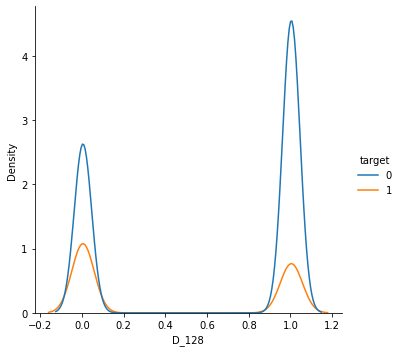

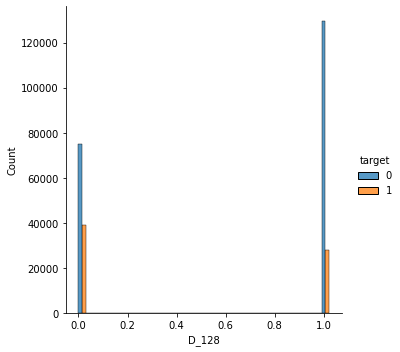

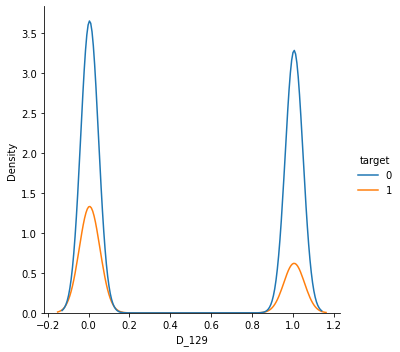

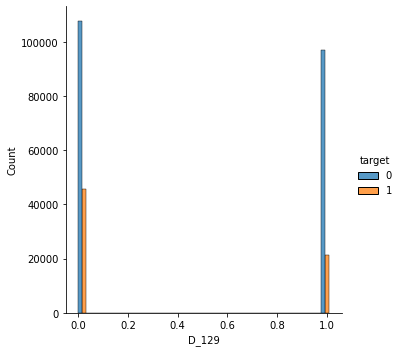

In [ ]:
sns.displot( benchmark, x='D_128', hue="target", kind="kde",warn_singular=False)
sns.displot(benchmark, x='D_128', hue="target", multiple="dodge")

sns.displot( benchmark, x='D_129', hue="target", kind="kde",warn_singular=False)
sns.displot(benchmark, x='D_129', hue="target", multiple="dodge")

# sns.displot( benchmark, x='D_119', hue="target", kind="kde",warn_singular=False)
# sns.displot(benchmark, x='D_119', hue="target", multiple="dodge")

In [ ]:
benchmark['D_108'].value_counts()

0.005606    1
0.003419    1
0.006744    1
0.009881    1
0.002970    1
           ..
0.003001    1
0.004003    1
0.005685    1
0.009163    1
0.001646    1
Name: D_108, Length: 1456, dtype: int64